<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#true-positives" data-toc-modified-id="true-positives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>true positives</a></span></li><li><span><a href="#false-positives" data-toc-modified-id="false-positives-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>false positives</a></span></li><li><span><a href="#false-negatives" data-toc-modified-id="false-negatives-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>false negatives</a></span></li><li><span><a href="#true-positives" data-toc-modified-id="true-positives-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>true positives</a></span></li><li><span><a href="#false-positives" data-toc-modified-id="false-positives-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>false positives</a></span></li><li><span><a href="#false-negatives" data-toc-modified-id="false-negatives-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>false negatives</a></span></li></ul></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
from skimage import io, color, transform, feature, exposure, filters, morphology
import my_measures # note, this was updated March 27; make sure you are using the current version! 
%matplotlib inline

In [3]:
# file paths/names

root_dir = '/Users/aucherserr/Desktop/MachineLearning/myGit/ml/mlAssignment2/plane_data/'

ci_path = root_dir + 'cropped_images_18/' # cropped images for training
l_file = root_dir + 'plane_labels_2018.csv' # csv with labels

# get labels and extract features from images

In [4]:
# all labels
plane_data = pd.read_csv(l_file)
print(plane_data.head())
print(plane_data.shape)

                   img_name  plane
0  2016-08-02T13+50+24_430Z  False
1  2016-08-02T14+12+37_390Z  False
2  2016-08-02T22+20+26_600Z  False
3  2016-08-03T12+04+30_670Z  False
4  2016-08-03T12+32+21_790Z  False
(6758, 2)


In [5]:
# in downscaling the image, what do you want the new dimensions to be?
# the original dimensions of cropped images: (60, 140), which if 8,400 pixels
# dims = (15, 35) # 25% of the original size, 525 pixels
# dims = (18, 42) # 30% of the original size, 525 pixels
dims = (30, 70) # 30% of the original size, 525 pixels

(60, 140)
(60, 140, 4)
(60, 140)
(60, 140, 4)
(60, 140)
(60, 140, 4)


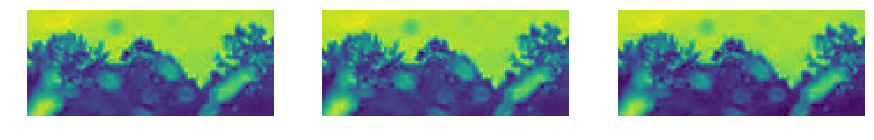

In [19]:
## Playing with Color Channels

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
im = '2017-10-09T15+38+13_860Z'


for c, ax in zip(range(3), axs):
    imname = ci_path + im + '.png'
    img_raw = io.imread(imname)
    tmp_im = np.zeros(img_raw.shape, dtype="uint8")
    tmp_im = img_raw[:,:,c]
    ax.imshow(tmp_im)
    print(tmp_im.shape)
    print(img_raw.shape)
    ax.set_axis_off()


downscaled image shape: 
(30, 70)
image representation (first row of pixels): 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


example of transformation: 


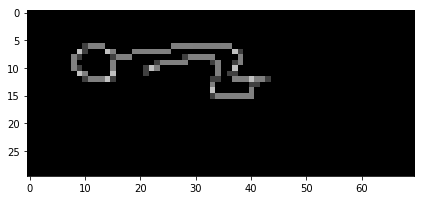

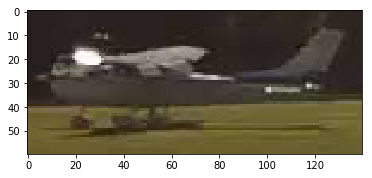

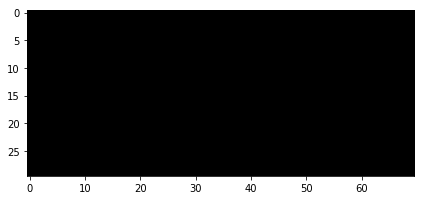

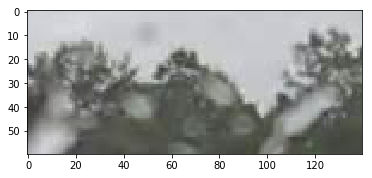

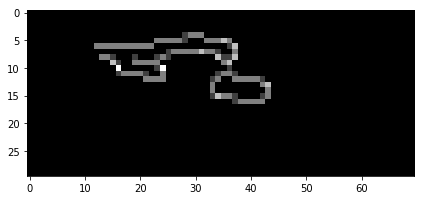

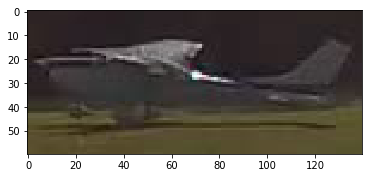

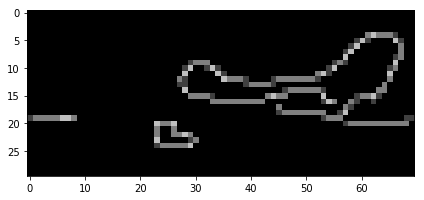

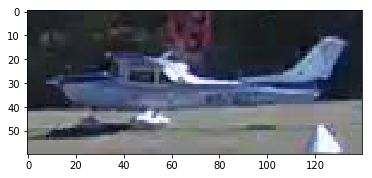

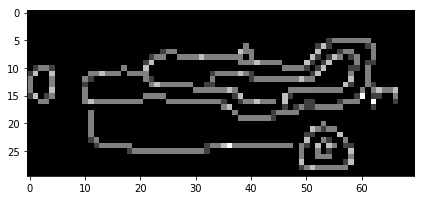

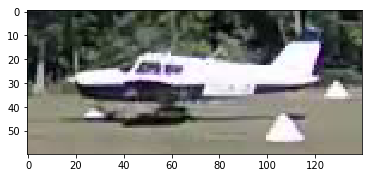

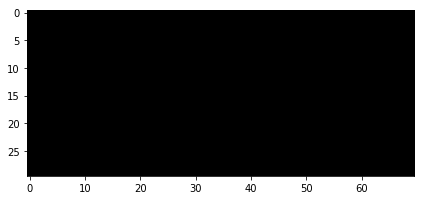

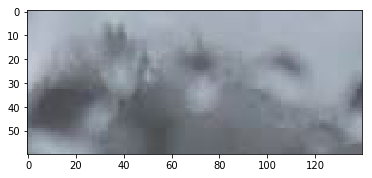

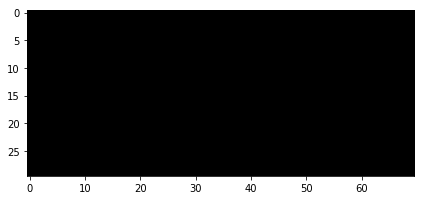

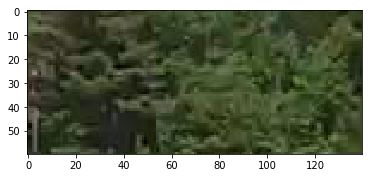

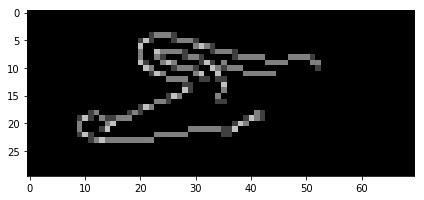

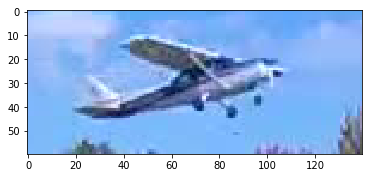

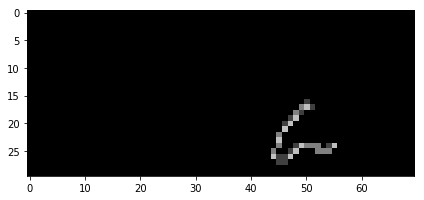

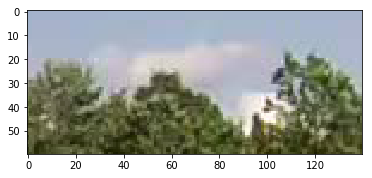

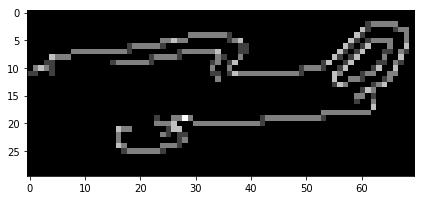

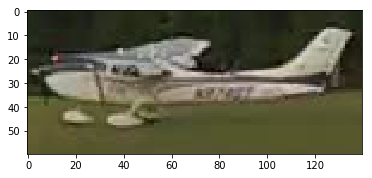

In [48]:
# scikit-image documentation on methods used for feature extraction: 
#    http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2gray
#    http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize
#    http://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.canny

def image_manipulation(imname, imview=False):
    warnings.filterwarnings('ignore')
    imname = ci_path + imname + '.png'
    img_raw = io.imread(imname)
    gray = color.rgb2gray(img_raw) # remove color

#     ## thresholding on multiple color channels
#     c_ims = []
#     for c in range(3): #loop through color channels
#         tmp_im = img_raw[:,:,c]
#         filtered = filters.scharr(tmp_im)
# #         filtered = filters.sobel(tmp_im)
# #         downscaled = transform.resize(filtered, (dims[0], dims[1]))
# #         canny = feature.canny(downscaled, sigma = 1.5)  
# #         plt.figure()
# #         plt.imshow(downscaled)
#         c_ims.append(downscaled.astype(bool))
    
# #   add together all the features that all three color channels saw
#     final_image = c_ims[0] & c_ims[1] & c_ims[2]

    yellow = img_raw[:,:,2]
    prefiltered = filters.sobel(yellow)
    filtered = filters.scharr(prefiltered)
    canny = feature.canny(filtered, sigma = 2, low_threshold= .01)
    downscaled = transform.resize(canny, (dims[0], dims[1]))
    final_image = downscaled
    
    if imview==True:  
#         plt.figure()
#         io.imshow(canny)
#         plt.figure()
#         io.imshow(canny2)
        plt.figure()
        io.imshow(final_image)
        plt.figure()
        plt.imshow(img_raw)
    warnings.filterwarnings('always')
    return final_image

# test the function, look at input/output
test_image = image_manipulation('2017-07-19T12+47+39_180Z', True)

test_image = image_manipulation('2017-10-09T15+38+13_860Z', True)
test_image = image_manipulation('2017-08-27T12+27+15_090Z', True)
test_image = image_manipulation('2016-10-14T16+24+24_060Z', True)
test_image = image_manipulation('2017-07-30T19+51+27_270Z', True)
test_image = image_manipulation('2018-01-12T12+51+53_080Z', True)
test_image = image_manipulation('2017-07-09T18+59+02_850Z', True)
test_image = image_manipulation('2016-10-07T17+44+06_330Z', True)
test_image = image_manipulation('2017-08-19T19+34+08_350Z', True)
test_image = image_manipulation('2017-07-16T23+13+31_720Z', True)
print('downscaled image shape: ')
print(test_image.shape)
print('image representation (first row of pixels): ')
print(test_image[0])
print('\n')
print('example of transformation: ')


In [21]:
#wrongly tagged negative - filter it out from training
plane_data = plane_data[plane_data.img_name != '2017-09-01T18+57+47_590Z']

In [49]:
# construct lists for features, labels, and a crosswalk reference to image names

features_list = []
y_list = []
imnames_list = []

for index, row in plane_data.iterrows(): 
    features_list.append(image_manipulation(row['img_name']))
    y_list.append(row['plane'])
    imnames_list.append(row['img_name'])
    

In [47]:
print(imnames_list[0])
features_list[0]

2016-08-02T13+50+24_430Z


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [50]:
# convert the lists to ndarrays
features = np.asarray(features_list)
Y = np.asarray(y_list)
imgs = np.asarray(imnames_list)
print('Shape of original feature representation: ')
print(features.shape)

# flatten the images ndarray to one row per image
features_flat = features.reshape((features.shape[0], -1))

print('Shape of flat feature representation: ')
print(features_flat.shape)

print('Shape of Y: ')
print(Y.shape)

print('Number of images with planes: ')
print(Y.sum())

Shape of original feature representation: 
(6757, 30, 70)
Shape of flat feature representation: 
(6757, 2100)
Shape of Y: 
(6757,)
Number of images with planes: 
101


In [51]:
# create train and test sets
from sklearn.model_selection import train_test_split

data_train, data_test, y_train, y_test, imgs_train, imgs_test = train_test_split(features_flat, 
    Y, imgs, test_size = 0.25, random_state = 37)

print('Shape of training set: ')
print(y_train.shape)
print('Number of training images that contain an airplane: ')
print(y_train.sum())

print(' ')

print('Shape of test set: ')
print(y_test.shape)
print('Number of test images that contain an airplane: ')
print(y_test.sum())

Shape of training set: 
(5067,)
Number of training images that contain an airplane: 
80
 
Shape of test set: 
(1690,)
Number of test images that contain an airplane: 
21


# train Perceptron

In [64]:
# MODEL: Perceptron
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(data_train, y_train)

prc_performance = my_measures.BinaryClassificationPerformance(prc.predict(data_train), y_train, 'prc')
prc_performance.compute_measures()
prc_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(prc_performance.performance_measures)

prc_performance_test = my_measures.BinaryClassificationPerformance(prc.predict(data_test), y_test, 'prc')
prc_performance_test.compute_measures()
prc_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(prc_performance_test.performance_measures)

prc_performance_test.img_indices()
prc_img_indices_to_view = prc_performance_test.image_indices

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package fr

TRAINING SET: 
{'Pos': 80, 'Neg': 4987, 'TP': 77, 'TN': 4987, 'FP': 0, 'FN': 3, 'Accuracy': 0.99940793368857317, 'Precision': 1.0, 'Recall': 0.96250000000000002, 'desc': 'prc', 'set': 'train'}
TEST SET: 
{'Pos': 21, 'Neg': 1669, 'TP': 17, 'TN': 1665, 'FP': 4, 'FN': 4, 'Accuracy': 0.99526627218934915, 'Precision': 0.80952380952380953, 'Recall': 0.80952380952380953, 'desc': 'prc', 'set': 'test'}


In [11]:
def performance_examples(typ, measures):
    iiv = ''
    if typ == 'FP':
        iiv = typ + '_indices'
    elif typ == 'TP':
        iiv = typ + '_indices'
    elif typ == 'FN':
        iiv = typ + '_indices'
    else:
        raise ValueError('input must be "TP", "FP", or "FN"')
    for img in measures[iiv]:
#         print(imnames_list[img])
        warnings.filterwarnings('ignore')    
        plt.figure()
        print(imgs_test[img])
        plt.title(imgs_test[img])
        lookat = ci_path + imgs_test[img] + '.png' # location of original image
        io.imshow(lookat) # show original image
        plt.figure()
        io.imshow(data_test[img].reshape(dims[0], dims[1])) # show manipulation for feature representation
        warnings.filterwarnings('always')


# look at examples of Perceptron classifications

## true positives

2016-10-07T17+44+06_330Z
2017-07-09T15+23+27_200Z
2017-10-11T16+24+14_620Z
2016-10-10T19+44+49_610Z
2016-11-17T17+57+49_310Z
2016-11-17T18+00+45_290Z
2016-10-11T14+32+27_680Z
2017-07-09T19+11+06_580Z
2017-07-04T18+32+56_490Z
2016-10-07T18+23+39_200Z
2017-02-04T19+17+08_500Z
2017-07-09T18+27+26_140Z
2017-07-30T19+51+27_270Z


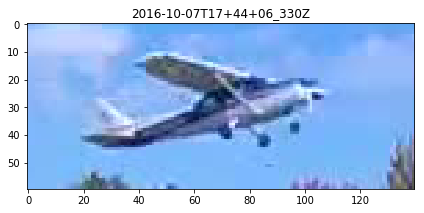

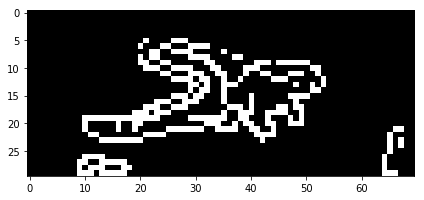

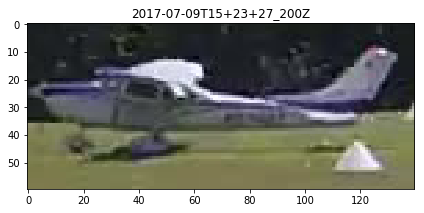

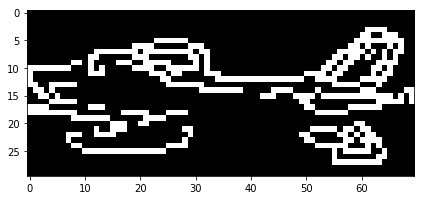

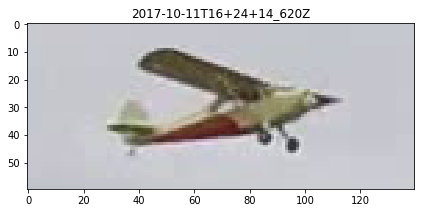

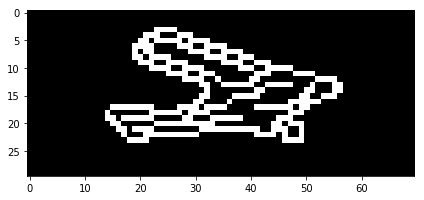

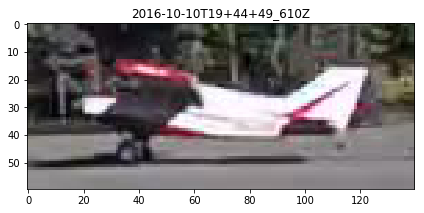

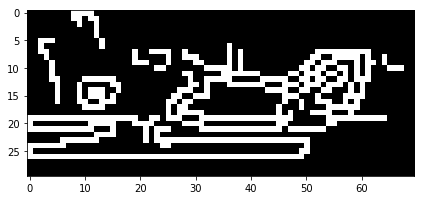

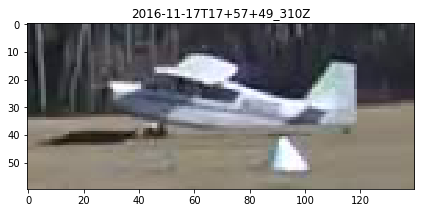

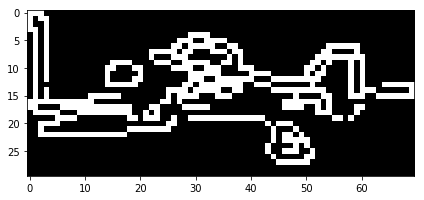

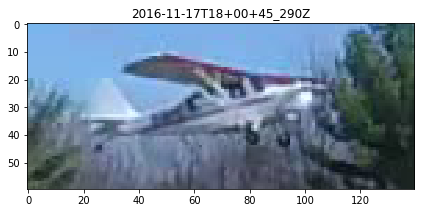

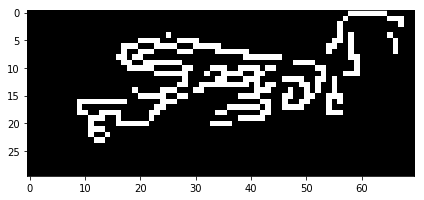

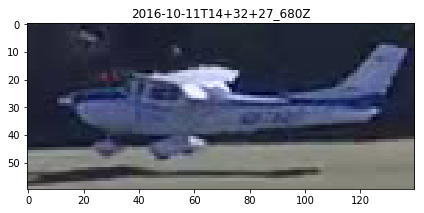

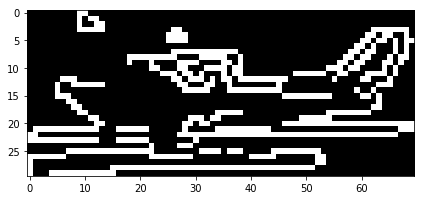

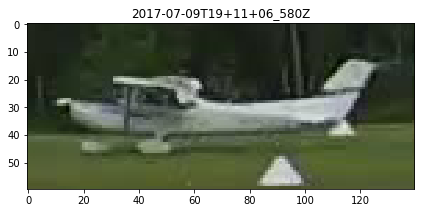

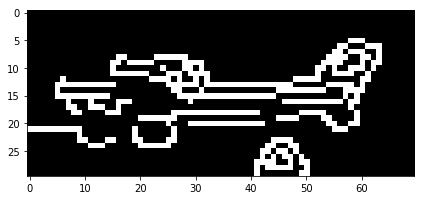

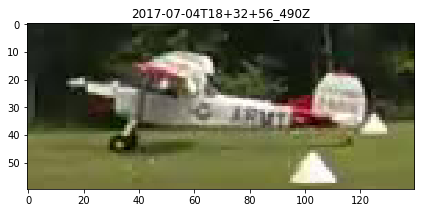

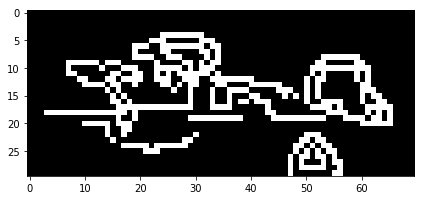

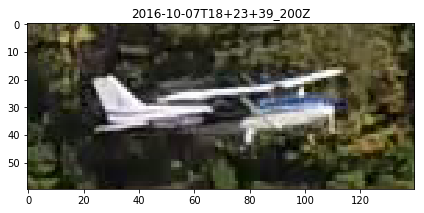

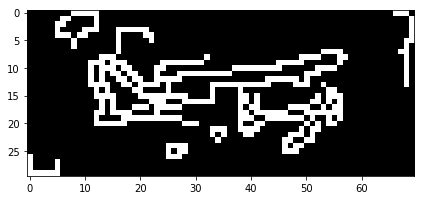

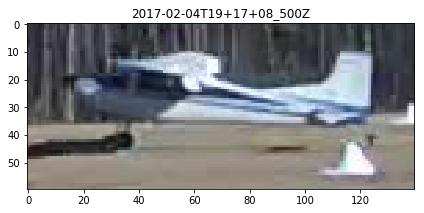

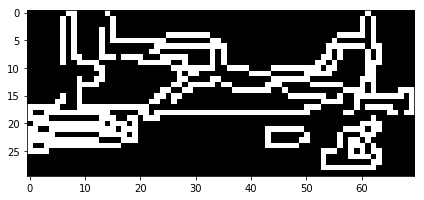

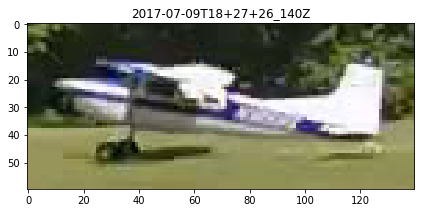

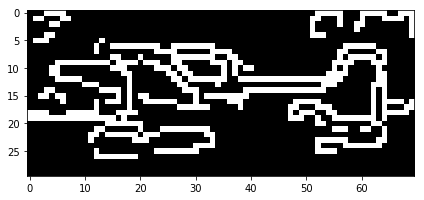

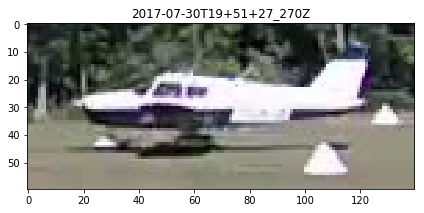

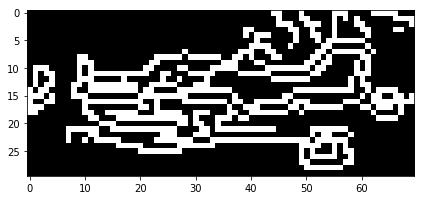

In [18]:
performance_examples('TP', prc_img_indices_to_view)

## false positives

2016-08-12T18+36+47_340Z


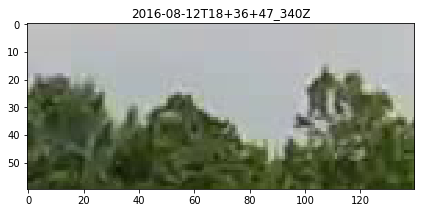

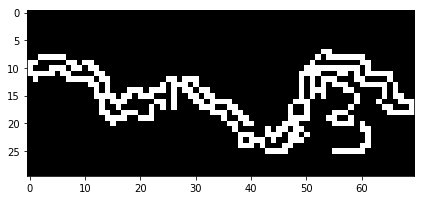

In [19]:
performance_examples('FP', prc_img_indices_to_view)

## false negatives

2016-08-23T16+35+03_560Z
2017-07-09T12+47+11_400Z
2017-07-19T12+47+39_180Z
2017-08-27T12+27+15_090Z


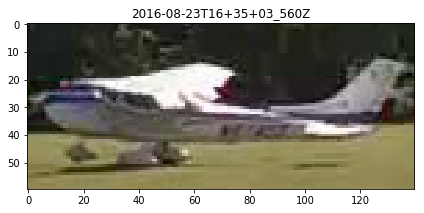

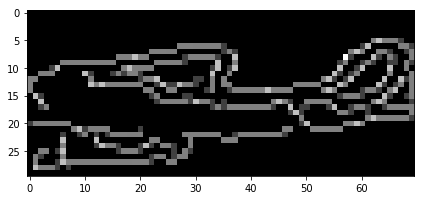

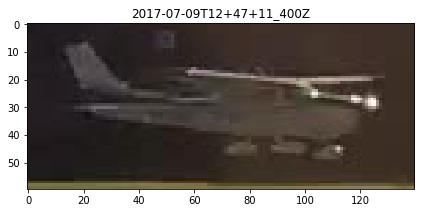

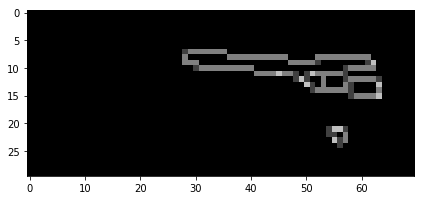

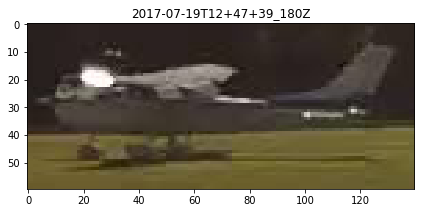

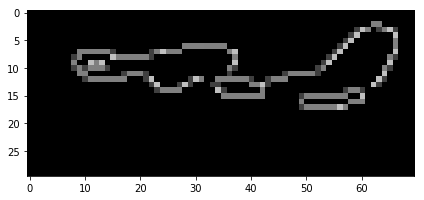

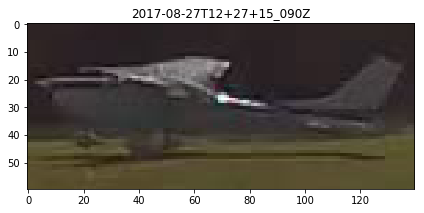

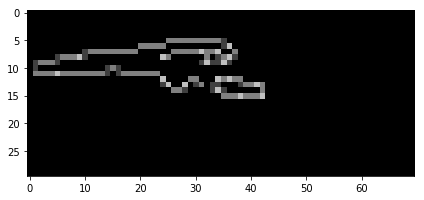

In [65]:
performance_examples('FN', prc_img_indices_to_view)

# train Multilayer Perceptron, a.k.a. neural network

In [53]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
nn = neural_network.MLPClassifier(max_iter=2500,
#                                   random_state=30,
                                  solver='lbfgs',
                                  alpha = 1.5, 
                                  hidden_layer_sizes=(70,30,10),
                                 )
print(nn)
nn.fit(data_train, y_train)

nn_performance = my_measures.BinaryClassificationPerformance(nn.predict(data_train), y_train, 'nn')
nn_performance.compute_measures()
nn_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn_performance.performance_measures)

nn_performance_test = my_measures.BinaryClassificationPerformance(nn.predict(data_test), y_test, 'nn_test')
nn_performance_test.compute_measures()
nn_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn_performance_test.performance_measures)

nn_performance_test.img_indices()
nn_img_indices_to_view = nn_performance_test.image_indices

MLPClassifier(activation='relu', alpha=1.5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(70, 30, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
TRAINING SET: 
{'Pos': 80, 'Neg': 4987, 'TP': 78, 'TN': 4987, 'FP': 0, 'FN': 2, 'Accuracy': 0.99960528912571545, 'Precision': 1.0, 'Recall': 0.97499999999999998, 'desc': 'nn', 'set': 'train'}
TEST SET: 
{'Pos': 21, 'Neg': 1669, 'TP': 17, 'TN': 1669, 'FP': 0, 'FN': 4, 'Accuracy': 0.99763313609467452, 'Precision': 1.0, 'Recall': 0.80952380952380953, 'desc': 'nn_test', 'set': 'test'}


In [54]:
from sklearn.externals import joblib
joblib.dump(nn, 'nn.pkl')

['nn.pkl']

# look at examples of neural network classifications

## true positives

2016-10-07T17+44+06_330Z
2017-07-09T15+23+27_200Z
2017-10-11T16+24+14_620Z
2016-10-10T19+44+49_610Z
2016-11-17T17+57+49_310Z
2017-07-09T12+47+11_400Z
2016-11-17T18+00+45_290Z
2016-10-11T14+32+27_680Z
2017-02-04T19+20+26_310Z
2017-07-09T19+11+06_580Z
2016-10-11T11+30+52_230Z
2017-07-04T18+32+56_490Z
2016-10-07T18+23+39_200Z
2017-02-04T19+17+08_500Z
2017-07-09T18+27+26_140Z
2017-07-30T19+51+27_270Z
2016-11-12T19+05+51_000Z


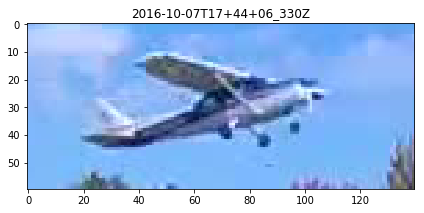

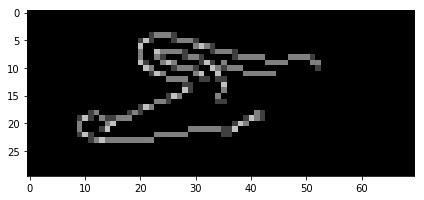

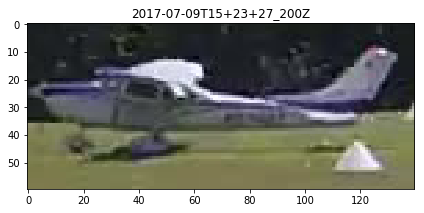

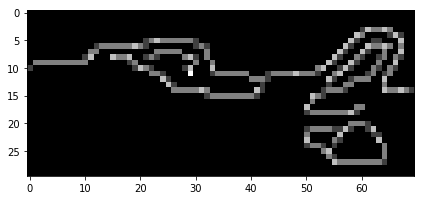

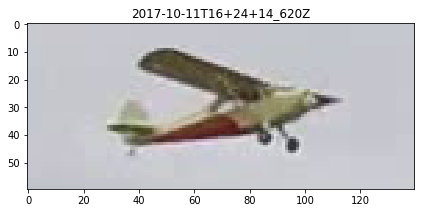

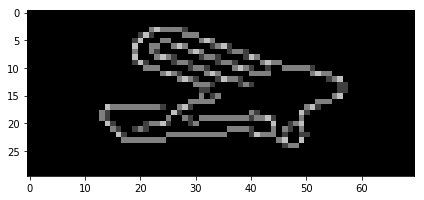

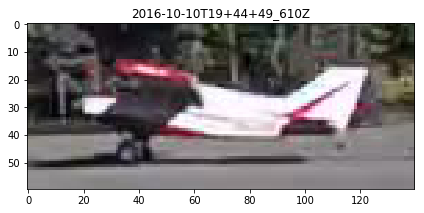

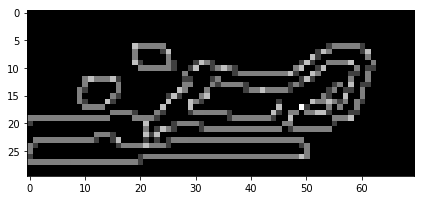

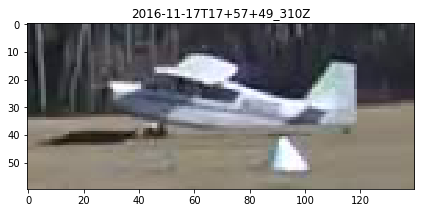

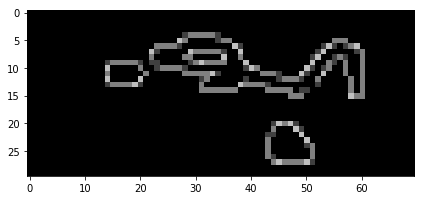

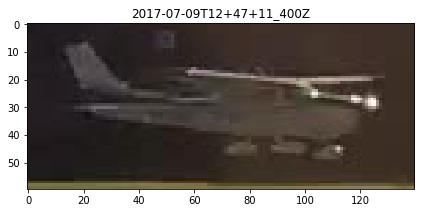

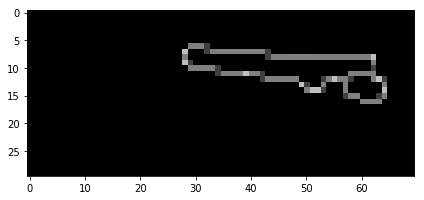

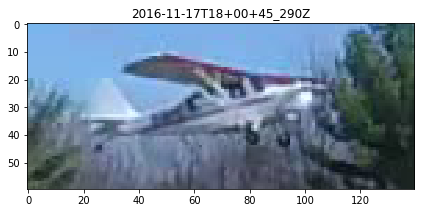

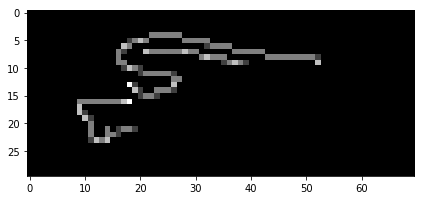

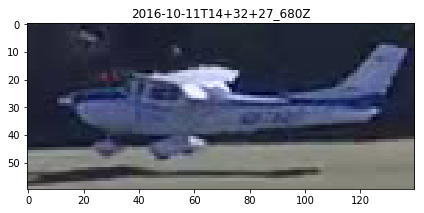

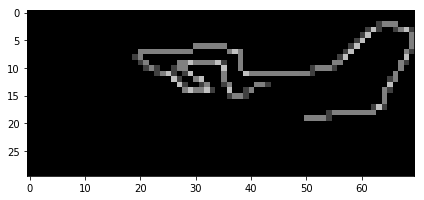

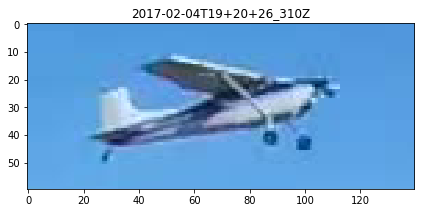

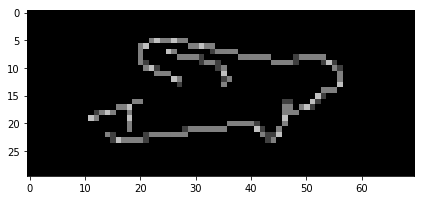

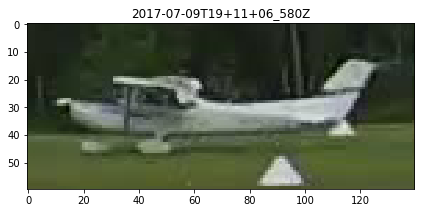

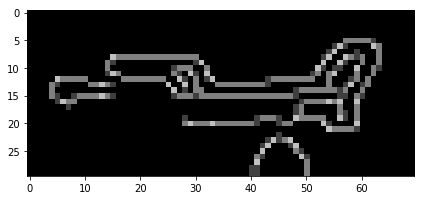

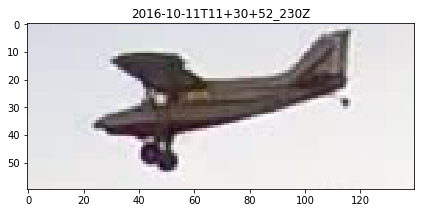

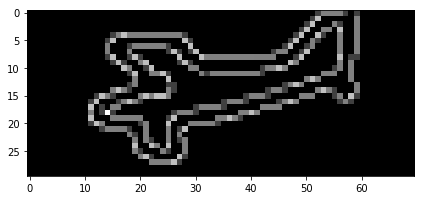

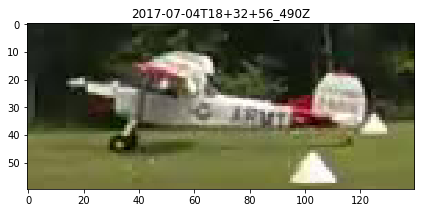

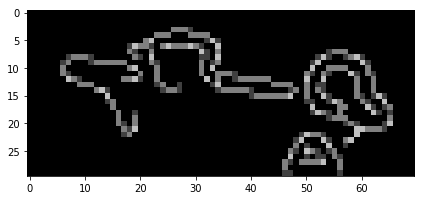

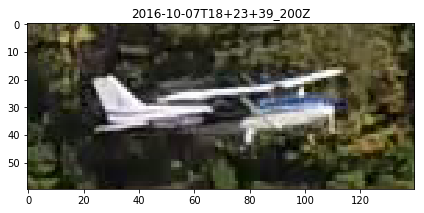

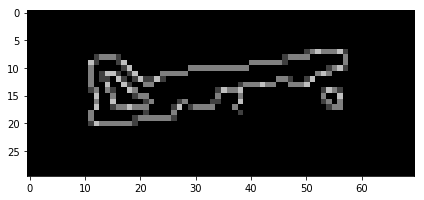

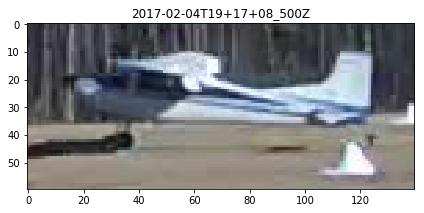

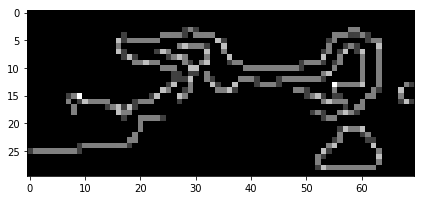

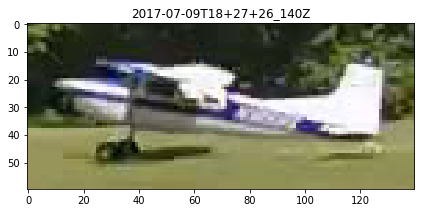

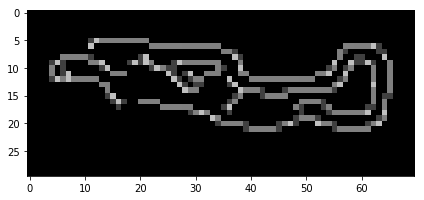

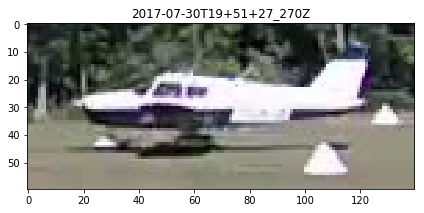

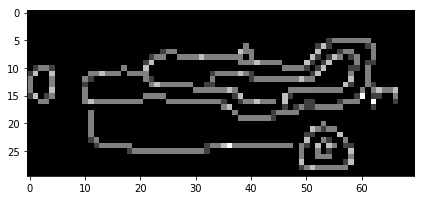

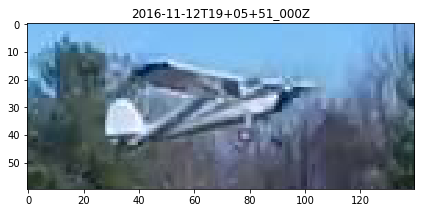

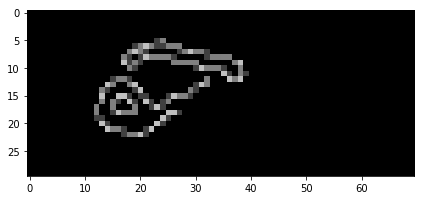

In [56]:
performance_examples('TP', nn_img_indices_to_view)

## false positives

In [39]:
performance_examples('FP', nn_img_indices_to_view)

## false negatives

2016-08-23T16+35+03_560Z
2017-07-19T12+47+39_180Z
2016-10-14T16+24+24_060Z
2017-08-27T12+27+15_090Z


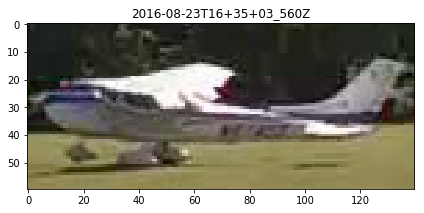

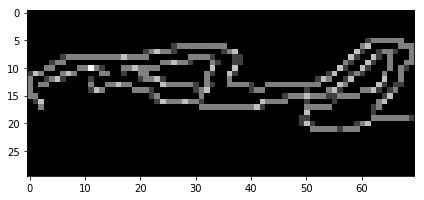

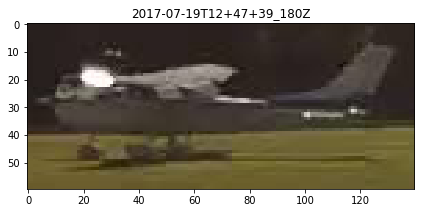

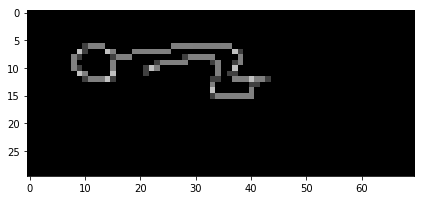

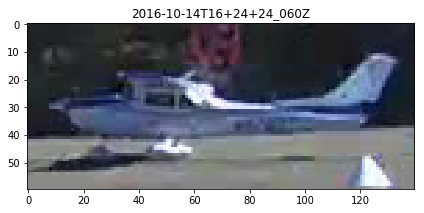

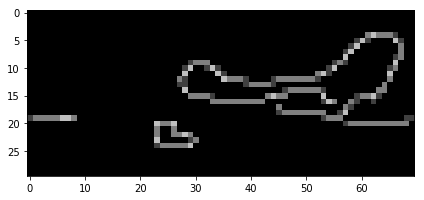

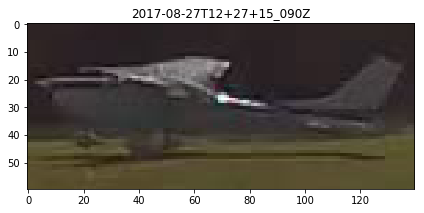

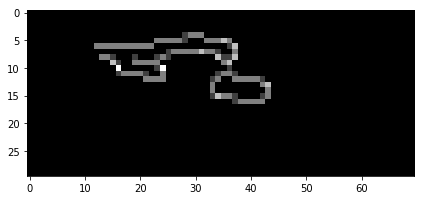

In [55]:
performance_examples('FN', nn_img_indices_to_view)

In [ ]:
def performance_examples(typ, measures):
    iiv = ''
    if typ == 'FP':
        iiv = typ + '_indices'
    elif typ == 'TP':
        iiv = typ + '_indices'
    elif typ == 'FN':
        iiv = typ + '_indices'
    else:
        raise ValueError('input must be "TP", "FP", or "FN"')
    for img in measures[iiv]:
#         print(imnames_list[img])
        warnings.filterwarnings('ignore')    
        plt.figure()
        print(imgs_test[img])
        plt.title(imgs_test[img])
        lookat = ci_path + imgs_test[img] + '.png' # location of original image
        io.imshow(lookat) # show original image
        plt.figure()
        io.imshow(data_test[img].reshape(dims[0], dims[1])) # show manipulation for feature representation
        warnings.filterwarnings('always')

In [16]:
nn_img_indices_to_view

{'FN_indices': [41, 878, 1326, 1609, 1679],
 'FP_indices': [244, 1385, 1554],
 'TP_indices': [297,
  299,
  560,
  586,
  726,
  779,
  831,
  836,
  886,
  1085,
  1255,
  1391,
  1430,
  1486,
  1580,
  1640]}

# comparisons

In [61]:
# list of fits to compare: 
final_fits = []
# final_fits.append(prc_performance.performance_measures)
# final_fits.append(prc_performance_test.performance_measures)
final_fits.append(nn_performance.performance_measures)
final_fits.append(nn_performance_test.performance_measures)

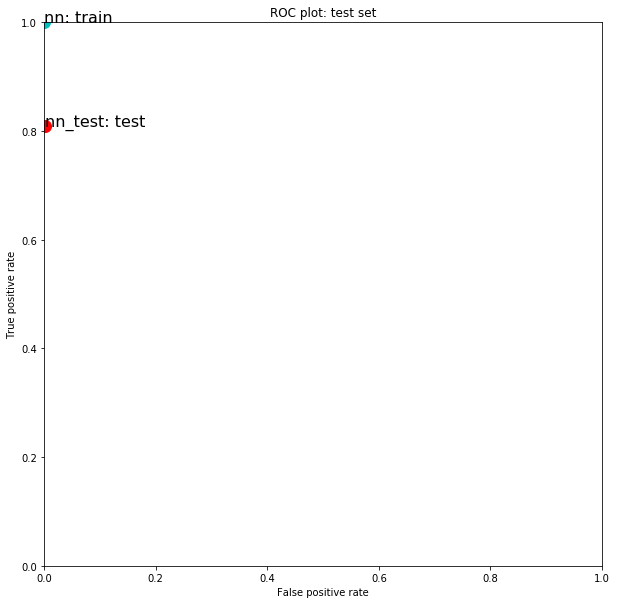

In [62]:
plt.figure(figsize=(10,10))

for fit in final_fits:
    if fit['set'] == 'train':
        color = 'co'
    else:
        color = 'ro'
    plt.plot(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], color, markersize=12)
    plt.text(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], fit['desc'] + ': ' + fit['set'], fontsize=16)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
